# Criar gráficos de séries temporais

 Criar um gráfico com a série temporal de cada regional (10)
 
 Serão 3 gráficos, um para cada crime e dentro de cada plot, 10 subplots

In [1]:
import pandas as pd 
import statsmodels.api as sms
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Abrindo o dataframe dos crimes
df = pd.read_csv('../dados/dados_limpos/base_limpa_junho_2021.csv', sep=',', encoding="latin-1")
df['OCORRENCIA_DATA'] = pd.to_datetime(df['OCORRENCIA_DATA'])
df['OCORRENCIA_HORA'] = pd.to_datetime(df['OCORRENCIA_HORA'])
df['OCORRENCIA_DATA'] = df.OCORRENCIA_DATA.dt.normalize() # Para retirar o horário
df = df[df['OCORRENCIA_ANO'] >= 2016]

df = df[df['REGIONAL'] != 'REGIÃO METROPOLITANA']

# Define o período de agrupamento
df['periodo'] = df.OCORRENCIA_DATA.dt.to_period("M")

In [45]:
df['REGIONAL'].unique()

array(['BOQUEIRÃO', 'PINHEIRINHO', 'SANTA FELICIDADE', 'CAJURU', 'CIC',
       'MATRIZ', 'BOA VISTA', 'TATUQUARA', 'BAIRRO NOVO', 'PORTÃO'],
      dtype=object)

In [3]:
### Agrupando os tipos de crimes nos três tópicos  
roubo = df[(df["DESCRICAO1"] == "Roubo") | (df["DESCRICAO1"] == "Furto")]


violencia = df[(df["DESCRICAO1"] == "Violação de Medida Protetiva Lei Maria da Penha") | \
               ((df["DESCRICAO1"] != "Violação de Medida Protetiva Lei Maria da Penha") & (df["DESCRICAO2"] == "Violação de Medida Protetiva Lei Maria da Penha")) |\
               (df["DESCRICAO1"] == "Importunação\xa0sexual") |\
               (df["DESCRICAO1"] == "Estupro") |\
               (df["DESCRICAO1"] == "Exploração de menores") |\
               (df["DESCRICAO1"] == "Maus tratos à pessoas") |\
               (df["DESCRICAO1"] == "Abuso de incapazes")]

substancia = df[df["DESCRICAO1"] =="Substância Ilícita"]

In [126]:
# df['periodo'] = df['periodo'].to_timestamp()
print(len(roubo),len(violencia),len(substancia))

7481 2647 5726


In [4]:
roubo = roubo.groupby(['periodo', 'REGIONAL'])['QTDE'].sum().reset_index()
roubo = roubo.set_index('periodo')
roubo.index = roubo.index.to_timestamp()

violencia = violencia.groupby(['periodo', 'REGIONAL'])['QTDE'].sum().reset_index()
violencia = violencia.set_index('periodo')
violencia.index = violencia.index.to_timestamp()


substancia = substancia.groupby(['periodo', 'REGIONAL'])['QTDE'].sum().reset_index()
substancia = substancia.set_index('periodo')
substancia.index = substancia.index.to_timestamp()


roubo.head(3)

,REGIONAL,QTDE
periodo,,
2016-01-01,BAIRRO NOVO,21
2016-01-01,BOA VISTA,14
2016-01-01,BOQUEIRÃO,46


In [293]:
substancia.REGIONAL.unique()

array(['BAIRRO NOVO', 'BOA VISTA', 'BOQUEIRÃO', 'CAJURU', 'CIC', 'MATRIZ',
       'PINHEIRINHO', 'PORTÃO', 'SANTA FELICIDADE', 'TATUQUARA'],
      dtype=object)

In [5]:
roubo_bairro_novo = roubo[roubo['REGIONAL']=='BAIRRO NOVO']['QTDE'].reset_index(name='QTDE')
roubo_bairro_novo = roubo_bairro_novo.set_index('periodo')

roubo_boa_vista = roubo[roubo['REGIONAL']=='BOA VISTA']['QTDE'].reset_index(name='QTDE')
roubo_boa_vista = roubo_boa_vista.set_index('periodo')

roubo_boqueirao = roubo[roubo['REGIONAL']=='BOQUEIRÃO']['QTDE'].reset_index(name='QTDE')
roubo_boqueirao = roubo_boqueirao.set_index('periodo')

roubo_cajuru = roubo[roubo['REGIONAL']=='CAJURU']['QTDE'].reset_index(name='QTDE')
roubo_cajuru = roubo_cajuru.set_index('periodo')

roubo_cic = roubo[roubo['REGIONAL']=='CIC']['QTDE'].reset_index(name='QTDE')
roubo_cic = roubo_cic.set_index('periodo')

roubo_matriz = roubo[roubo['REGIONAL']=='MATRIZ']['QTDE'].reset_index(name='QTDE')
roubo_matriz = roubo_matriz.set_index('periodo')

roubo_pinheirinho = roubo[roubo['REGIONAL']=='PINHEIRINHO']['QTDE'].reset_index(name='QTDE')
roubo_pinheirinho = roubo_pinheirinho.set_index('periodo')

roubo_portao = roubo[roubo['REGIONAL']=='PORTÃO']['QTDE'].reset_index(name='QTDE')
roubo_portao = roubo_portao.set_index('periodo')

roubo_santa_felicidade = roubo[roubo['REGIONAL']=='SANTA FELICIDADE']['QTDE'].reset_index(name='QTDE')
roubo_santa_felicidade = roubo_santa_felicidade.set_index('periodo')

roubo_tatuquara = roubo[roubo['REGIONAL']=='TATUQUARA']['QTDE'].reset_index(name='QTDE')
roubo_tatuquara = roubo_tatuquara.set_index('periodo')


roubo_serie_bairro_novo = seasonal_decompose(roubo_bairro_novo, model='additive', extrapolate_trend='freq')
roubo_serie_boa_vista = seasonal_decompose(roubo_boa_vista, model='additive', extrapolate_trend='freq')
roubo_serie_boqueirao = seasonal_decompose(roubo_boqueirao, model='additive', extrapolate_trend='freq')
roubo_serie_cajuru = seasonal_decompose(roubo_cajuru, model='additive', extrapolate_trend='freq')
roubo_serie_cic = seasonal_decompose(roubo_cic, model='additive', extrapolate_trend='freq')

roubo_serie_matriz = seasonal_decompose(roubo_matriz, model='additive', extrapolate_trend='freq')
roubo_serie_pinheirinho = seasonal_decompose(roubo_pinheirinho, model='additive', extrapolate_trend='freq')
roubo_serie_portao = seasonal_decompose(roubo_portao, model='additive', extrapolate_trend='freq')
roubo_serie_santa_felicidade = seasonal_decompose(roubo_santa_felicidade, model='additive', extrapolate_trend='freq')
# roubo_serie_tatuquara = seasonal_decompose(roubo_tatuquara_merge, model='additive', extrapolate_trend='freq')



In [425]:
roubo_tatuquara_merge = roubo_tatuquara.merge(roubo_bairro_novo, how='outer',left_index=True, right_index=True)
# roubo_tatuquara_merge['QTDE_x'] = roubo_tatuquara_merge['QTDE_x'].fillna(0)
roubo_tatuquara_merge = roubo_tatuquara_merge.drop(['QTDE_y'], axis=1)
roubo_tatuquara_merge = roubo_tatuquara_merge.rename(columns={'QTDE_x': 'QTDE'})
roubo_tatuquara_merge.sample(3)

,QTDE
periodo,
2016-12-01,3.0
2020-01-01,3.0
2019-10-01,4.0


In [424]:
len(roubo_tatuquara_merge)

66

In [ ]:
def merge_date(df1, df2):
    df_merge = roubo_tatuquara.merge(roubo_bairro_novo, how='outer',left_index=True, right_index=True)
    df_merge['QTDE_x'] = df['QTDE_x'].fillna(0)
     

In [414]:
len(substancia_matriz)

66

In [329]:
roubo_tatuquara.tail(3)

,QTDE
periodo,
2021-04-01,8
2021-05-01,2
2021-06-01,3


In [433]:
violencia_bairro_novo = violencia[violencia['REGIONAL']=='BAIRRO NOVO']['QTDE'].reset_index(name='QTDE')
violencia_bairro_novo = violencia_bairro_novo.set_index('periodo')

violencia_boa_vista = violencia[violencia['REGIONAL']=='BOA VISTA']['QTDE'].reset_index(name='QTDE')
violencia_boa_vista = violencia_boa_vista.set_index('periodo')

violencia_boqueirao = violencia[violencia['REGIONAL']=='BOQUEIRÃO']['QTDE'].reset_index(name='QTDE')
violencia_boqueirao = violencia_boqueirao.set_index('periodo')

violencia_cajuru = violencia[violencia['REGIONAL']=='CAJURU']['QTDE'].reset_index(name='QTDE')
violencia_cajuru = violencia_cajuru.set_index('periodo')

violencia_cic = violencia[violencia['REGIONAL']=='CIC']['QTDE'].reset_index(name='QTDE')
violencia_cic = violencia_cic.set_index('periodo')

violencia_matriz = violencia[violencia['REGIONAL']=='MATRIZ']['QTDE'].reset_index(name='QTDE')
violencia_matriz = violencia_matriz.set_index('periodo')

violencia_pinheirinho = violencia[violencia['REGIONAL']=='PINHEIRINHO']['QTDE'].reset_index(name='QTDE')
violencia_pinheirinho = violencia_pinheirinho.set_index('periodo')

violencia_portao = violencia[violencia['REGIONAL']=='PORTÃO']['QTDE'].reset_index(name='QTDE')
violencia_portao = violencia_portao.set_index('periodo')

violencia_santa_felicidade = violencia[violencia['REGIONAL']=='SANTA FELICIDADE']['QTDE'].reset_index(name='QTDE')
violencia_santa_felicidade = violencia_santa_felicidade.set_index('periodo')

violencia_tatuquara = violencia[violencia['REGIONAL']=='TATUQUARA']['QTDE'].reset_index(name='QTDE')
violencia_tatuquara = violencia_tatuquara.set_index('periodo')


# violencia_serie_bairro_novo = seasonal_decompose(violencia_bairro_novo, model='additive')
# violencia_serie_boa_vista = seasonal_decompose(violencia_boa_vista, model='additive', extrapolate_trend='freq')
# violencia_serie_boqueirao = seasonal_decompose(violencia_boqueirao, model='additive', extrapolate_trend='freq')
# violencia_serie_cajuru = seasonal_decompose(violencia_cajuru, model='additive', extrapolate_trend='freq')
# violencia_serie_cic = seasonal_decompose(violencia_cic, model='additive', extrapolate_trend='freq')

# violencia_serie_matriz = seasonal_decompose(violencia_matriz, model='additive', extrapolate_trend='freq')
# violencia_serie_pinheirinho = seasonal_decompose(violencia_pinheirinho, model='additive', extrapolate_trend='freq')
# violencia_serie_portao = seasonal_decompose(violencia_portao, model='additive', extrapolate_trend='freq')
# violencia_serie_santa_felicidade = seasonal_decompose(violencia_santa_felicidade, model='additive', extrapolate_trend='freq')
# # violencia_serie_tatuquara = seasonal_decompose(violencia_tatuquara, model='additive', extrapolate_trend='freq')


In [343]:

substancia_bairro_novo = substancia[substancia['REGIONAL']=='BAIRRO NOVO']['QTDE'].reset_index(name='QTDE')
substancia_bairro_novo = substancia_bairro_novo.set_index('periodo')

substancia_boa_vista = substancia[substancia['REGIONAL']=='BOA VISTA']['QTDE'].reset_index(name='QTDE')
substancia_boa_vista = substancia_boa_vista.set_index('periodo')

substancia_boqueirao = substancia[substancia['REGIONAL']=='BOQUEIRÃO']['QTDE'].reset_index(name='QTDE')
substancia_boqueirao = substancia_boqueirao.set_index('periodo')

substancia_cajuru = substancia[substancia['REGIONAL']=='CAJURU']['QTDE'].reset_index(name='QTDE')
substancia_cajuru = substancia_cajuru.set_index('periodo')

substancia_cic = substancia[substancia['REGIONAL']=='CIC']['QTDE'].reset_index(name='QTDE')
substancia_cic = substancia_cic.set_index('periodo')

substancia_matriz = substancia[substancia['REGIONAL']=='MATRIZ']['QTDE'].reset_index(name='QTDE')
substancia_matriz = substancia_matriz.set_index('periodo')

substancia_pinheirinho = substancia[substancia['REGIONAL']=='PINHEIRINHO']['QTDE'].reset_index(name='QTDE')
substancia_pinheirinho = substancia_pinheirinho.set_index('periodo')

substancia_portao = substancia[substancia['REGIONAL']=='PORTÃO']['QTDE'].reset_index(name='QTDE')
substancia_portao = substancia_portao.set_index('periodo')

substancia_santa_felicidade = substancia[substancia['REGIONAL']=='SANTA FELICIDADE']['QTDE'].reset_index(name='QTDE')
substancia_santa_felicidade = substancia_santa_felicidade.set_index('periodo')

substancia_tatuquara = substancia[substancia['REGIONAL']=='TATUQUARA']['QTDE'].reset_index(name='QTDE')
substancia_tatuquara = substancia_tatuquara.set_index('periodo')


# substancia_serie_bairro_novo = seasonal_decompose(substancia_bairro_novo, model='additive', extrapolate_trend='freq')
# substancia_serie_boa_vista = seasonal_decompose(substancia_boa_vista, model='additive', extrapolate_trend='freq')
# substancia_serie_boqueirao = seasonal_decompose(substancia_boqueirao, model='additive', extrapolate_trend='freq')
# substancia_serie_cajuru = seasonal_decompose(substancia_cajuru, model='additive', extrapolate_trend='freq')
# substancia_serie_cic = seasonal_decompose(substancia_cic, model='additive', extrapolate_trend='freq')

substancia_serie_matriz = seasonal_decompose(substancia_matriz, model='additive', extrapolate_trend='freq')
# substancia_serie_pinheirinho = seasonal_decompose(substancia_pinheirinho, model='additive', extrapolate_trend='freq')
# substancia_serie_portao = seasonal_decompose(substancia_portao, model='additive', extrapolate_trend='freq')
# substancia_serie_santa_felicidade = seasonal_decompose(substancia_santa_felicidade, model='additive', extrapolate_trend='freq')
# # substancia_serie_tatuquara = seasonal_decompose(substancia_tatuquara, model='additive', extrapolate_trend='freq')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2016-03-01 to 2021-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   QTDE    61 non-null     int64
dtypes: int64(1)
memory usage: 976.0 bytes


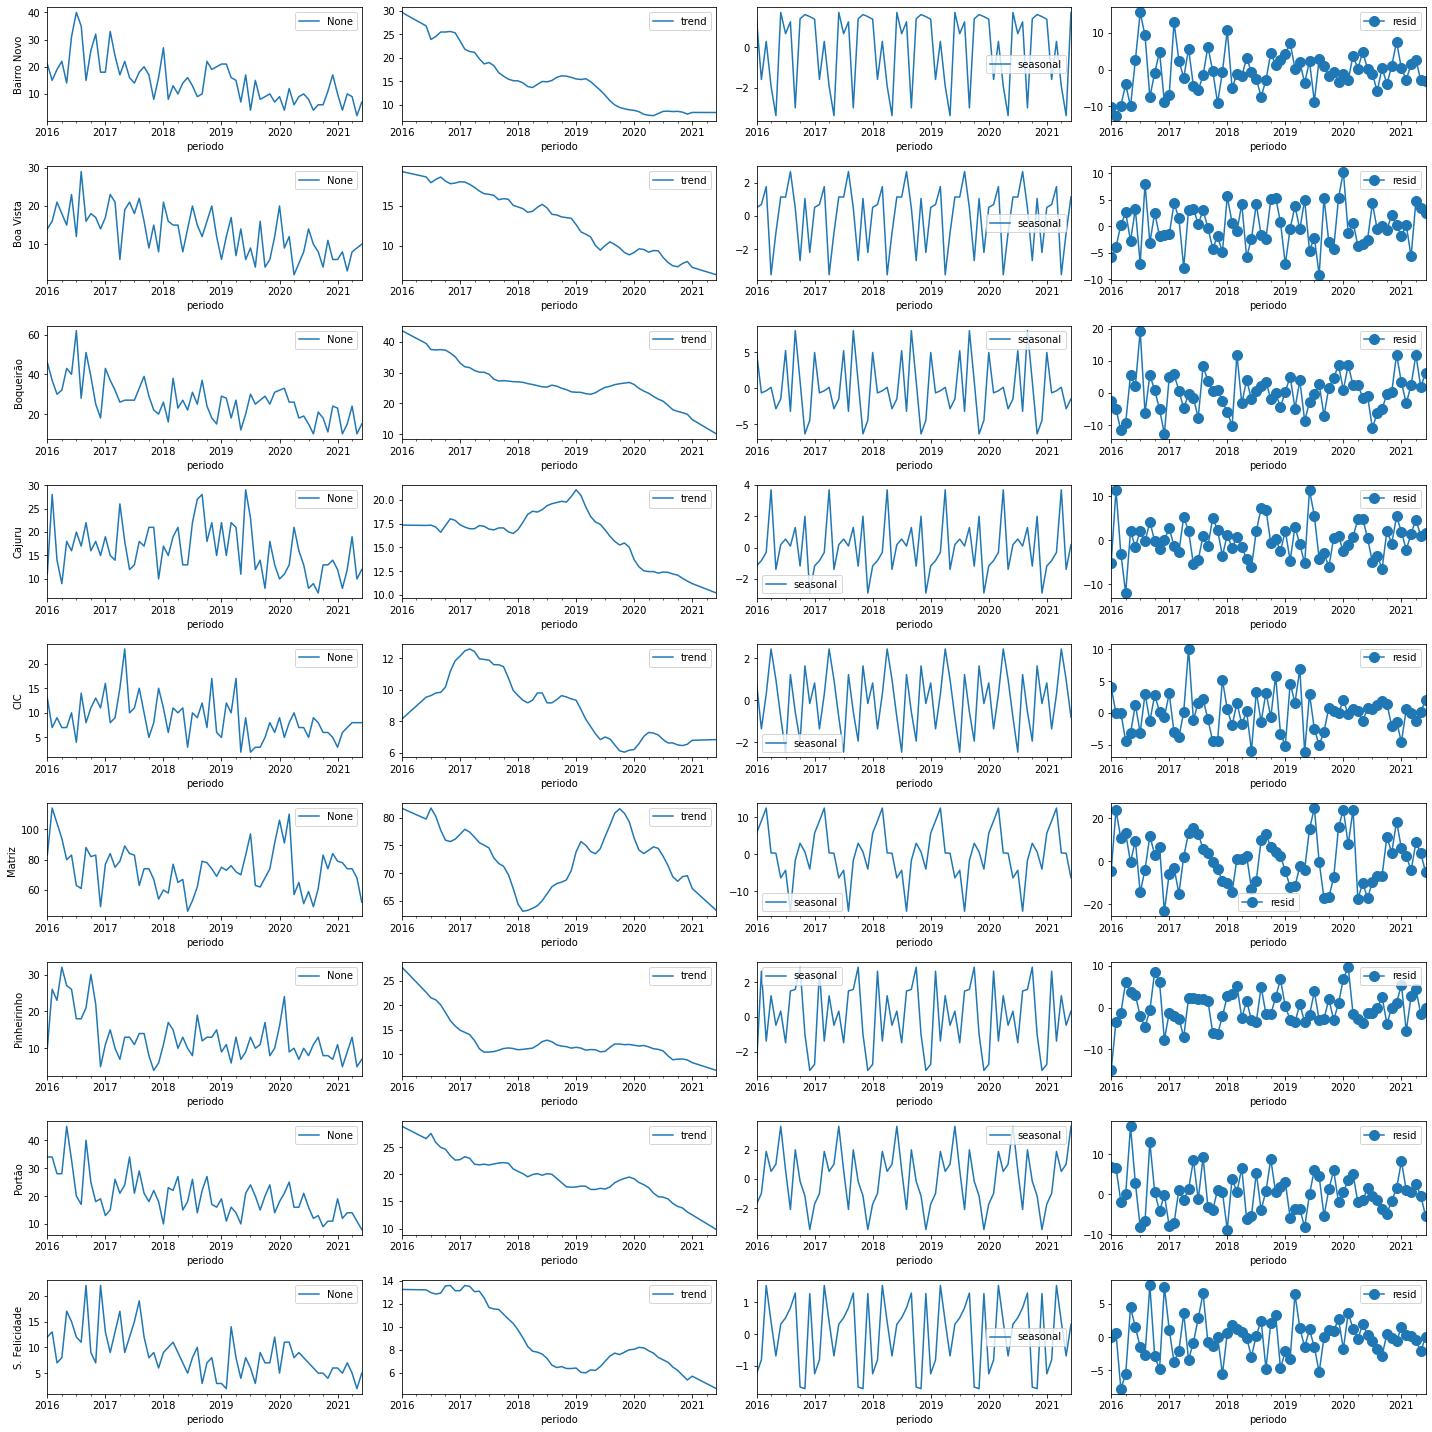

In [432]:

def plotseasonal(res, axes,string):
    res.observed.plot(ax=axes[0], legend=True)
    axes[0].set_ylabel(string)
#     axes[0].set_title('Observado')
    res.trend.plot(ax=axes[1], legend=True)
#     axes[0].set_ylabel(string)
    res.seasonal.plot(ax=axes[2], legend=True)
#     axes[2].set_ylabel(string)
    res.resid.plot(ax=axes[3], marker='o',markersize=10,legend=True)
#     axes[0].set_ylabel(string)


fig, axes = plt.subplots(ncols=4, nrows=9, sharex=False, figsize=(20,20))

plotseasonal(roubo_serie_bairro_novo, axes[0,:], 'Bairro Novo')
plotseasonal(roubo_serie_boa_vista, axes[1,:], 'Boa Vista')
plotseasonal(roubo_serie_boqueirao, axes[2,:], 'Boqueirão')
plotseasonal(roubo_serie_cajuru, axes[3,:], 'Cajuru')
plotseasonal(roubo_serie_cic, axes[4,:], 'CIC')
plotseasonal(roubo_serie_matriz, axes[5,:], 'Matriz')
plotseasonal(roubo_serie_pinheirinho, axes[6,:], 'Pinheirinho')
plotseasonal(roubo_serie_portao, axes[7,:], 'Portão')
plotseasonal(roubo_serie_santa_felicidade, axes[8,:], 'S. Felicidade')
# plotseasonal(roubo_serie_tatuquara, axes[9,:], 'Tatuquara')


plt.tight_layout()
plt.show()

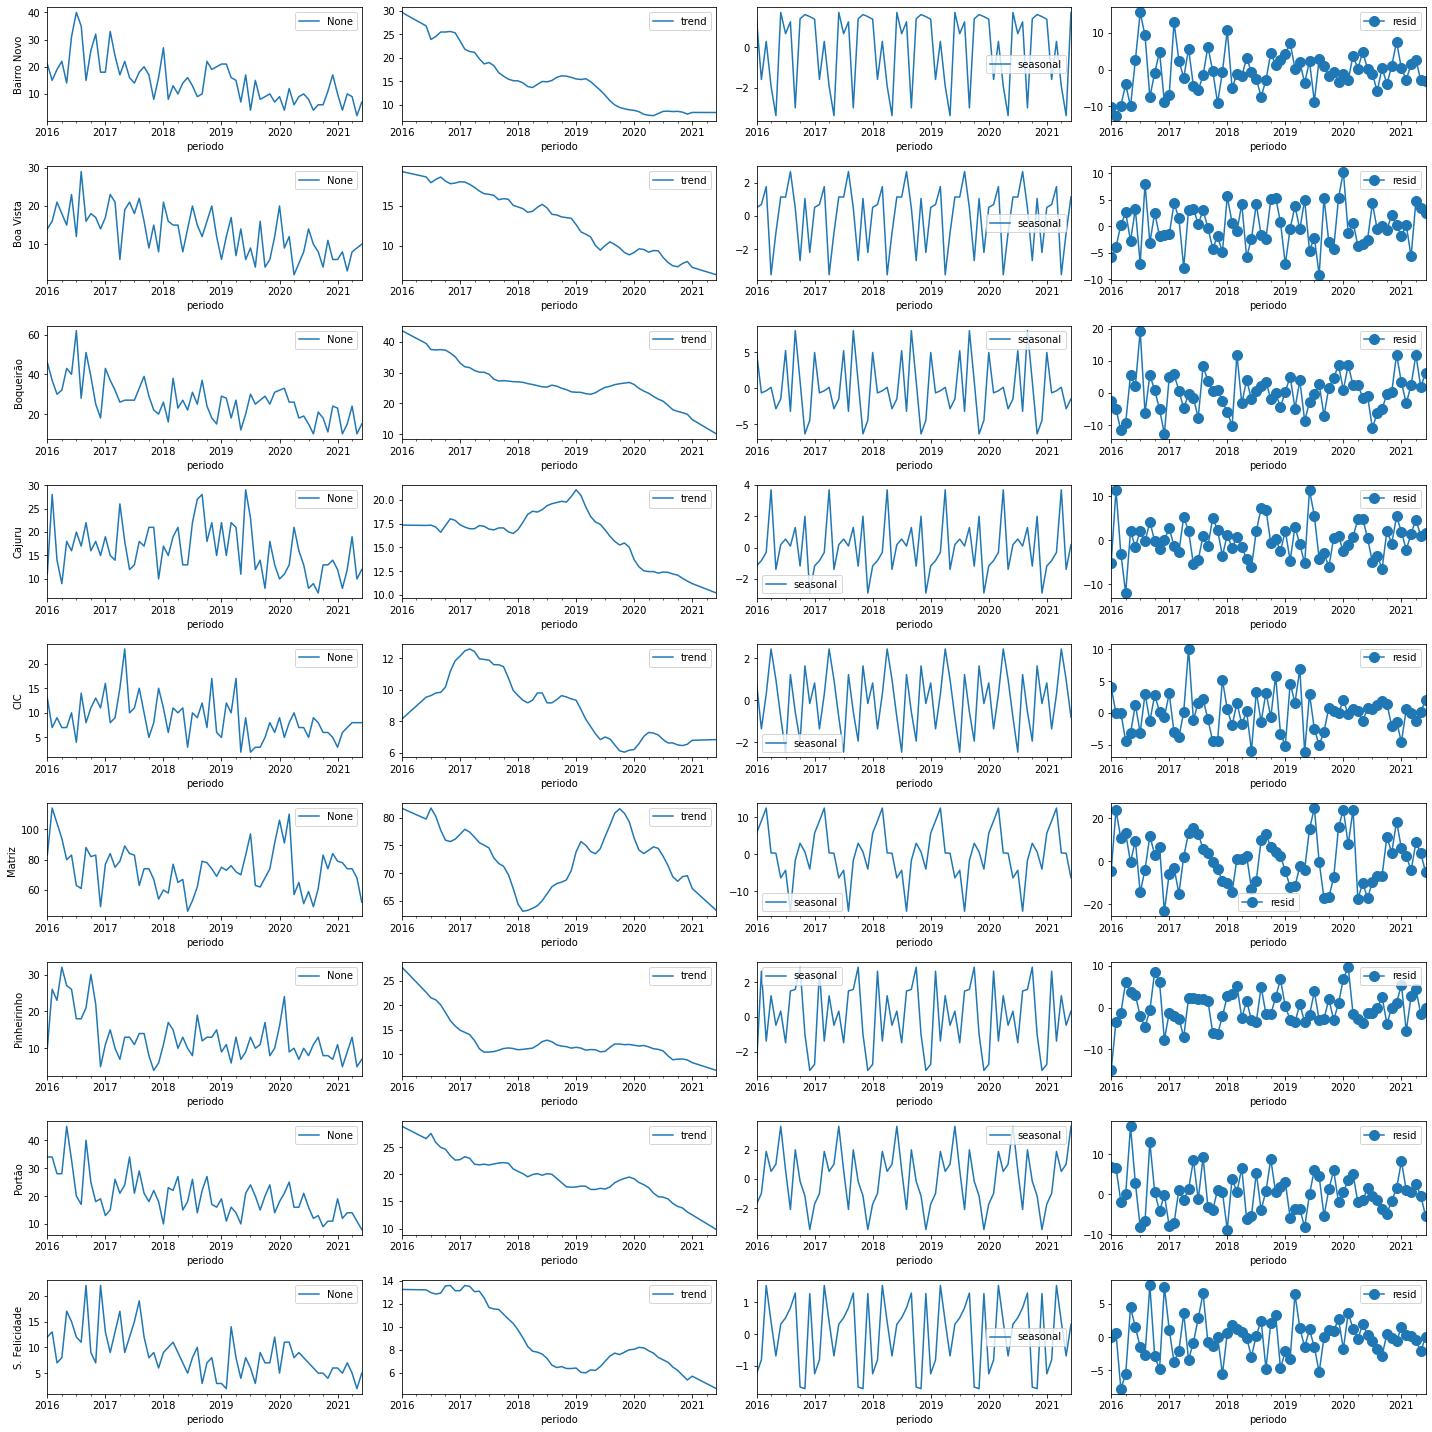

In [6]:

def plotseasonal(res, axes,string):
    res.observed.plot(ax=axes[0], legend=True)
    axes[0].set_ylabel(string)
#     axes[0].set_title('Observado')
    res.trend.plot(ax=axes[1], legend=True)
#     axes[0].set_ylabel(string)
    res.seasonal.plot(ax=axes[2], legend=True)
#     axes[2].set_ylabel(string)
    res.resid.plot(ax=axes[3], marker='o',markersize=10,legend=True)
#     axes[0].set_ylabel(string)


fig, axes = plt.subplots(ncols=4, nrows=9, sharex=False, figsize=(20,20))

plotseasonal(roubo_serie_bairro_novo, axes[0,:], 'Bairro Novo')
plotseasonal(roubo_serie_boa_vista, axes[1,:], 'Boa Vista')
plotseasonal(roubo_serie_boqueirao, axes[2,:], 'Boqueirão')
plotseasonal(roubo_serie_cajuru, axes[3,:], 'Cajuru')
plotseasonal(roubo_serie_cic, axes[4,:], 'CIC')
plotseasonal(roubo_serie_matriz, axes[5,:], 'Matriz')
plotseasonal(roubo_serie_pinheirinho, axes[6,:], 'Pinheirinho')
plotseasonal(roubo_serie_portao, axes[7,:], 'Portão')
plotseasonal(roubo_serie_santa_felicidade, axes[8,:], 'S. Felicidade')
# plotseasonal(roubo_serie_tatuquara, axes[9,:], 'Tatuquara')


plt.tight_layout()
plt.show()